In [1]:
import pandas as pd
import numpy as np
import kaggle as kg
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
os.environ["USERNAME"] = "<Your Kaggle User Name"
os.environ["KEY"] = "<Your Kaggle API Key from the key stored at ~/.kaggle/kaggle.json>"

In [ ]:
kg.api.authenticate()

In [ ]:
kg.api.dataset_download_files(dataset="eslamelsolya/laptop-price-prediction",
                              path="dataset",unzip=True)

In [2]:
data = pd.read_csv("dataset/laptop_data.csv")

In [3]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
data.shape

(1303, 12)

In [5]:
data.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [6]:
data.shape

(1303, 11)

In [7]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
def ordinal_encode_column(column_name):

    groupby_colname = data.groupby(by=column_name)["Price"].mean()
    groupby_colname = groupby_colname.sort_values()
    colname2idx = dict(zip(groupby_colname.index,list(range(len(groupby_colname)))))
    data[column_name] = data[column_name].map(colname2idx)

    return colname2idx

In [9]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [10]:
column_encoding_dict = dict()

ordinal_columns = list(data.columns[0:2]) + list(data.columns[3:5]) + list(data.columns[6:8])

for column_name in ordinal_columns:
    column_encoding_dict[column_name] = ordinal_encode_column(column_name)

In [11]:
with open("./ordinal_columns_encodings.pkl","wb") as file_handle:
    pickle.dump(column_encoding_dict,file_handle)

In [12]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,13,3,13.3,26,85,8GB,13,80,macOS,1.37kg,71378.6832
1,13,3,13.3,13,64,8GB,14,45,macOS,1.34kg,47895.5232
2,5,1,15.6,15,58,8GB,20,54,No OS,1.86kg,30636.0000
3,13,3,15.4,36,111,16GB,30,95,macOS,1.83kg,135195.3360
4,13,3,13.3,26,99,8GB,20,84,macOS,1.37kg,96095.8080


In [13]:
data[data.columns[8]].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [14]:
os_ohe = pd.crosstab(index=data.index,columns=data[data.columns[8]])

In [15]:
os_ohe

OpSys,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
row_0,,,,,,,,,
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,1,0,0,0
1299,0,0,0,0,0,1,0,0,0
1300,0,0,0,0,0,1,0,0,0


In [16]:
data.drop(labels=data.columns[8],inplace=True,axis=1)

In [17]:
y = data["Price"]
X = data.iloc[:,0:9]

In [18]:
X = pd.concat((X,os_ohe),axis=1)

In [19]:
X

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13,3,13.3,26,85,8GB,13,80,1.37kg,0,0,0,0,0,0,0,0,1
1,13,3,13.3,13,64,8GB,14,45,1.34kg,0,0,0,0,0,0,0,0,1
2,5,1,15.6,15,58,8GB,20,54,1.86kg,0,0,0,0,1,0,0,0,0
3,13,3,15.4,36,111,16GB,30,95,1.83kg,0,0,0,0,0,0,0,0,1
4,13,3,13.3,26,99,8GB,20,84,1.37kg,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,6,2,14.0,16,77,4GB,13,47,1.8kg,0,0,0,0,0,1,0,0,0
1299,6,2,13.3,22,77,16GB,30,47,1.3kg,0,0,0,0,0,1,0,0,0
1300,6,1,14.0,6,16,2GB,6,6,1.5kg,0,0,0,0,0,1,0,0,0
1301,5,1,15.6,6,77,6GB,12,32,2.19kg,0,0,0,0,0,1,0,0,0


In [20]:
X[X.columns[5]] = X[X.columns[5]].apply(lambda x: int(x.split("GB")[0]))

In [21]:
X.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13,3,13.3,26,85,8,13,80,1.37kg,0,0,0,0,0,0,0,0,1
1,13,3,13.3,13,64,8,14,45,1.34kg,0,0,0,0,0,0,0,0,1
2,5,1,15.6,15,58,8,20,54,1.86kg,0,0,0,0,1,0,0,0,0
3,13,3,15.4,36,111,16,30,95,1.83kg,0,0,0,0,0,0,0,0,1
4,13,3,13.3,26,99,8,20,84,1.37kg,0,0,0,0,0,0,0,0,1


In [22]:
X[X.columns[8]] = X[X.columns[8]].apply(lambda x: float(x.split("kg")[0]))

In [23]:
X.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13,3,13.3,26,85,8,13,80,1.37,0,0,0,0,0,0,0,0,1
1,13,3,13.3,13,64,8,14,45,1.34,0,0,0,0,0,0,0,0,1
2,5,1,15.6,15,58,8,20,54,1.86,0,0,0,0,1,0,0,0,0
3,13,3,15.4,36,111,16,30,95,1.83,0,0,0,0,0,0,0,0,1
4,13,3,13.3,26,99,8,20,84,1.37,0,0,0,0,0,0,0,0,1


In [24]:
X_columns = X.columns

In [25]:
X = np.array(X)
y = np.array(y)
y = y.reshape(y.shape[0],1)

In [26]:
X = (X - np.mean(X,axis=0))/np.std(X,axis=0)

In [27]:
with open("./X_mean_std.pkl","wb") as file_handle:
    pickle.dump([np.mean(X,axis=0),np.std(X,axis=0)],file_handle)

In [92]:
X = pd.DataFrame(data=X,columns=X_columns)

In [93]:
X.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,1.910326,0.838766,-1.204407,1.631160,0.806055,-0.075195,-0.659348,1.311399,-1.005283,-0.039208,-0.145464,-0.223517,-0.078598,-0.230987,-2.154227,-0.078598,-0.189132,9.961464
1,1.910326,0.838766,-1.204407,-0.250238,-0.018441,-0.075195,-0.527296,-0.153976,-1.050381,-0.039208,-0.145464,-0.223517,-0.078598,-0.230987,-2.154227,-0.078598,-0.189132,9.961464
2,-0.711217,-0.737171,0.408772,0.039207,-0.254011,-0.075195,0.265016,0.222835,-0.268684,-0.039208,-0.145464,-0.223517,-0.078598,4.329252,-2.154227,-0.078598,-0.189132,-0.100387
3,1.910326,0.838766,0.268495,3.078389,1.826860,1.498767,1.585537,1.939416,-0.313782,-0.039208,-0.145464,-0.223517,-0.078598,-0.230987,-2.154227,-0.078598,-0.189132,9.961464
4,1.910326,0.838766,-1.204407,1.631160,1.355719,-0.075195,0.265016,1.478870,-1.005283,-0.039208,-0.145464,-0.223517,-0.078598,-0.230987,-2.154227,-0.078598,-0.189132,9.961464


In [94]:
with open("./all_column_names.pkl","wb") as file_handle:
    pickle.dump(list(X.columns),file_handle)

In [28]:
X = np.array(X)

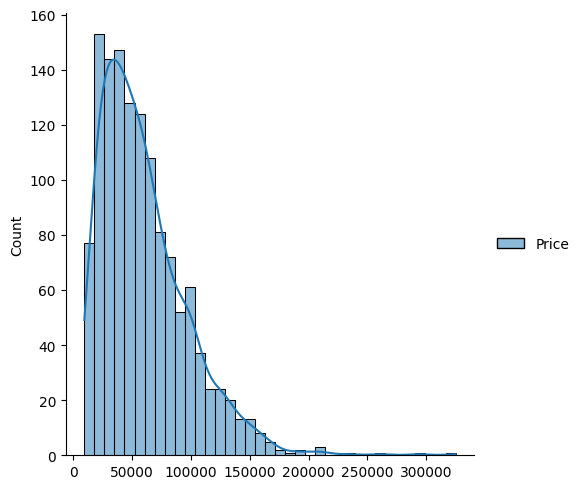

In [29]:
sns.displot(data=pd.DataFrame(y,columns=["Price"]),kde=True)

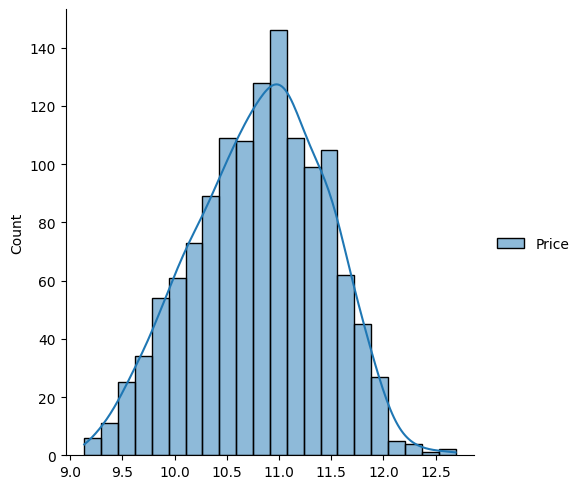

In [30]:
y = np.log(y)
sns.displot(data=pd.DataFrame(data=y,columns=["Price"]),kde=True)

In [31]:
X_train = X[0:int(0.75*X.shape[0]),:]
X_test = X[int(0.75*X.shape[0]):,:]

y_train = y[0:int(0.75*y.shape[0])]
y_test = y[int(0.75*y.shape[0]):]

In [32]:
def del_by_del_w(w0,w_vec):

    del_by_del_w0 = (-2/y_train.shape[0])*np.sum(y_train - (w0 + np.matmul(X_train,w_vec)))
    del_by_del_w_vec = (-2/y_train.shape[0])*np.matmul((y_train - (w0 + np.matmul(X_train,w_vec))).T,X_train).T

    return [del_by_del_w0, del_by_del_w_vec]

In [33]:
def mse(w0,w_vec,X,y):

    y_hat = (w0 + np.matmul(X,w_vec))
    error_vec = (y - y_hat)
    return (1/y_hat.shape[0])*np.matmul(error_vec.T,error_vec)

In [34]:
w0_initial = 0
w_vec_initial = np.zeros((18,1))
epsilon = 10**(-3)
epoch = 0
tol = 10**(-8)

while True:

    del_by_dels = del_by_del_w(w0_initial,w_vec_initial)
    
    w0_final = w0_initial - (epsilon * del_by_dels[0])
    w_vec_final = w_vec_initial - (epsilon * del_by_dels[1])

    mse_initial_train = mse(w0_initial,w_vec_initial,X_train,y_train)
    mse_final_train = mse(w0_final,w_vec_final,X_train,y_train)

    mse_initial_test = mse(w0_initial,w_vec_initial,X_test,y_test)

    if abs(mse_initial_train[0][0]-mse_final_train[0][0]) < tol:
        break

    print("Epoch # {}, Training Loss = {}, Testing Loss = {}".format(epoch,mse_initial_train[0][0],mse_initial_test[0][0]))

    w0_initial = w0_final
    w_vec_initial = w_vec_final

    epoch += 1

Epoch # 0, Training Loss = 117.40907974682955, Testing Loss = 117.16232680102479
Epoch # 1, Training Loss = 116.91840413838956, Testing Loss = 116.73487245512602
Epoch # 2, Training Loss = 116.42994491053976, Testing Loss = 116.30916556220944
Epoch # 3, Training Loss = 115.94368950214408, Testing Loss = 115.88519713395566
Epoch # 4, Training Loss = 115.45962546433555, Testing Loss = 115.46295826218606
Epoch # 5, Training Loss = 114.97774045897503, Testing Loss = 115.04244011765128
Epoch # 6, Training Loss = 114.49802225713529, Testing Loss = 114.62363394884197
Epoch # 7, Training Loss = 114.02045873761057, Testing Loss = 114.20653108082077
Epoch # 8, Training Loss = 113.54503788545082, Testing Loss = 113.79112291407581
Epoch # 9, Training Loss = 113.07174779052004, Testing Loss = 113.37740092339465
Epoch # 10, Training Loss = 112.60057664607895, Testing Loss = 112.96535665675886
Epoch # 11, Training Loss = 112.1315127473908, Testing Loss = 112.5549817342587
Epoch # 12, Training Loss = 